In [1]:
import os
import glob
import pickle

import numpy as np
from scipy import signal
from scipy.signal import hilbert
from astropy import units as u
from astropy.time import Time

import matplotlib.pyplot as plt

In [2]:
resol = 0.1*u.second

In [3]:
files = sorted(glob.glob('*.log'))
print(files)

['010618_21_N2_00_part_pulse.log', '020618_21_N2_00_part_pulse.log', '030618_21_N2_00_part_pulse.log', '040618_21_N2_00_part_pulse.log', '050618_21_N2_00_part_pulse.log']


In [4]:
full_data = []
for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
    full_data.append(data)

In [5]:
joined_array = full_data[0][2]
for i in range(1,len(full_data)):
    dt = full_data[i][1] - full_data[i-1][1] 
    zeros = np.zeros(int(round((dt.to(u.second)/resol).value, 0)))
    joined_array = np.append(joined_array, zeros)
    joined_array = np.append(joined_array, full_data[i][2])

In [6]:
n = len(joined_array)

In [7]:
"""
Переводим число x в двоичную систему. 
Предположим, получилось 101, количество цифр равно 3.
Значит, наше число содержится между 100 и 1000. 
Переводим 100 и 1000 в десятичную, и вычмсляем разность между ними и x.
"""
x = bin(n)
x_high = '0b1' + '0'*(len(x[2:]))
add_zeros_val = int(x_high, 2) - len(joined_array)

In [8]:
joined_array = np.append(joined_array, np.zeros(add_zeros_val))
#joined_array = np.append(joined_array, np.zeros(len(joined_array)))
fs = 10 # понять физический смысл этого числа

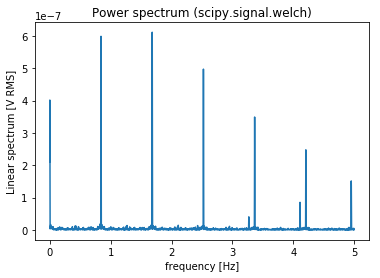

In [44]:
# signal.welch
f_1, Pxx_spec = signal.welch(joined_array, fs, 'flattop', 2048*10, scaling='spectrum')
plt.figure()
plt.plot(f_1, Pxx_spec)
#plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
# plt.xlim(0.8, 0.9)
plt.show()

In [45]:
idx = np.argwhere(np.diff(np.sign(Pxx_spec - 0.3*np.max(Pxx_spec)))).flatten()

In [52]:
idx = idx[1:] # В том случае, если захватывается 0

In [55]:
for i in range(1, len(idx), 2):
    max_point = np.argmax(Pxx_spec[idx[i - 1]:idx[i]])
    print(f_1[idx[i - 1] + max_point])

0.84130859375
1.6826171875
2.52392578125
3.365234375
4.20654296875
